In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample
import deltas.classifiers.models as models
from deltas.classifiers.mimic_train import LargeMarginClassifierMIMIC, MIMIC_torch
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = 'MIMIC-III-sepsis'  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=True)

MIMIC-III-sepsis: 4165
Number of attribues: 26
Classes total: 3301 - 864

Classes train: 1650 - 432
Classes test:  1651 - 432


In [3]:
data = data_clf['data']
# clf = MIMIC_torch(lr=0.001, cuda=False).fit(
#     data['X'], data['y'], epochs=50)
clf = models.NN(hidden_layer_sizes=(
    100, 500, 1000, 500, 100), max_iter=100).fit(data['X'], data['y'])
# param_grid = {'solver': ['lbfgs', 'sgd', 'adam'],
#               'hidden_layer_sizes': [(100,), (100, 500, 100), (100, 200, 200, 100), (100, 200, 500, 200, 100)],
#             'activation': ['relu', 'tanh', 'logistic'],
#             'learning_rate_init': [0.0001, 0.001, 0.01]}
# print('Tuning params with 5 fold CV')
#         # original
# grid_original = GridSearchCV(models.NN(), param_grid, refit=True, n_jobs=-1)
# grid_original.fit(data['X'], data['y'])
# clf = grid_original.best_estimator_
# print(f'Best params: {grid_original.best_params_}')

Original Data
plotting training data as data input


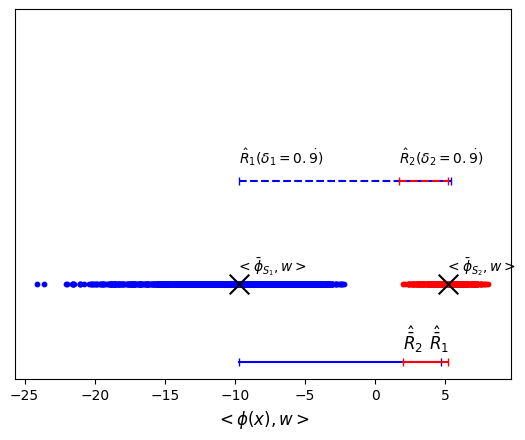

Budget 1000 found 138 viable downsampled solutions
Best solution found by removing 29 data points
Downsampled Data:


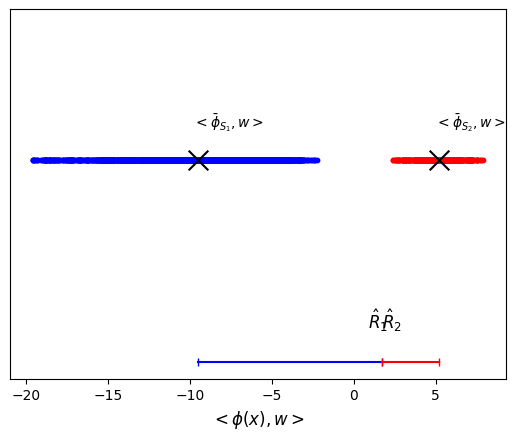

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y,
                                                     alpha=10,
                                                     _print=True,
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=1000,
                                                     parallel=True)

          Accuracy    G-Mean   ROC-AUC        F1
Method                                          
Original  0.985598  0.973616  0.989644  0.964871
Deltas    0.978877  0.951425  0.989644  0.946860 


Original


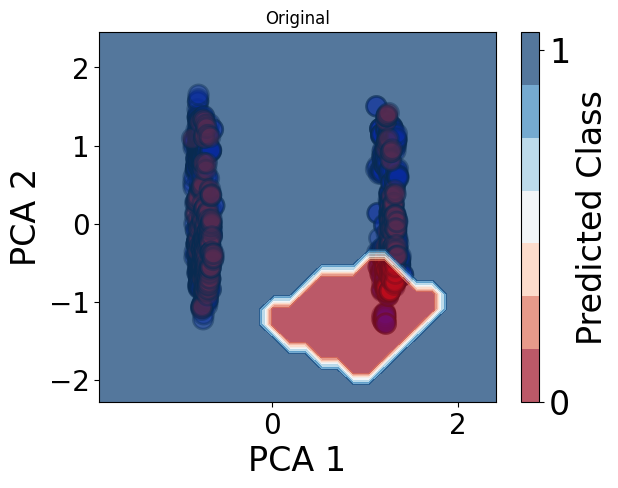

Deltas


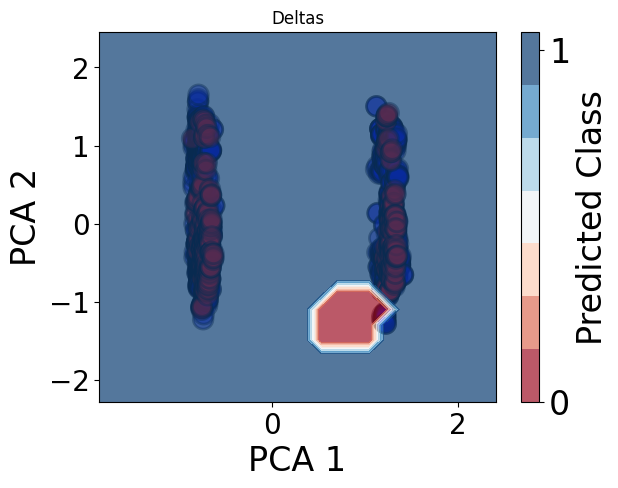

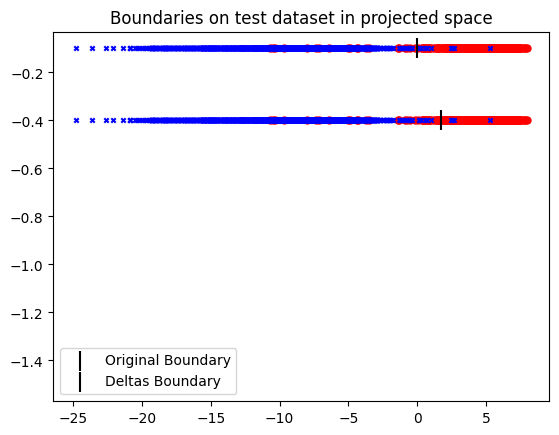

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.9856 & 0.9736 & 0.9896 & 0.9649 \\
Deltas & 0.9789 & 0.9514 & 0.9896 & 0.9469 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.985598,0.973616,0.989644,0.964871
Deltas,0.978877,0.951425,0.989644,0.946860


In [5]:
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
classifiers_dict = {'Original': clf, 'Deltas': deltas_model}
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
                     _plot=True, dim_reducer=data_clf['dim_reducer'])